In [2]:
#module importing
import pandas as pd
import random
import math
from IPython import display
from IPython.display import clear_output

In [3]:
#cvs file reading
world_file="counties_coordinates.csv"
world_data=pd.read_csv(world_file)


Saint Kitts and Nevis
KN
-62.75
17.33


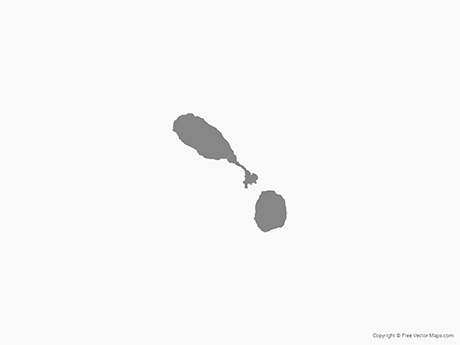

In [4]:
#data set
randnumber=random.randint(2,241)#choosing random country
global rand_country_name

rand_country_code=world_data.Code[randnumber]
rand_country_name=world_data.Name[randnumber]
rand_country_lat=world_data.Lat[randnumber]
rand_country_lon=world_data.Lon[randnumber]

#control point
print(rand_country_name)
print(rand_country_code)
print(rand_country_lon)
print(rand_country_lat)

#map vector
display.Image("https://fvmstatic.s3.amazonaws.com/maps/m/{}-EPS-01-0001.png".format(rand_country_code))


In [5]:
#defining function for distance between two countries
def Distance(guess):
    from math import sin,cos,acos
    
    global percent
    global distance_km
    
        
    target_lat=rand_country_lat
    target_lon=rand_country_lon
    target_lat_rad=target_lat/57.29577951
    target_lon_rad=target_lon/57.29577951
    
    #GUESS PART
    
    line=0
    global finding_line
    for i in world_data.Code:
        if i==guess:
            finding_line=line
        else:
            pass
        
        line+=1
        
    guess_lat=world_data.Lat[finding_line]
    guess_lon=world_data.Lon[finding_line]
    guess_lat_rad=guess_lat/57.29577951
    guess_lon_rad=guess_lon/57.29577951
    
    #distance formula
    distance_mile = 3963.0 * acos((sin(guess_lat_rad) * sin(target_lat_rad)) + cos(guess_lat_rad) * cos(target_lat_rad) * cos(target_lon_rad - guess_lon_rad))
    distance_km=distance_mile*1.609344
    
    percent=100-(distance_km/200)

    return distance_km,int(percent)
    

In [6]:
countries_name_list=world_data["Name"].to_list()
countries_code_list=world_data["Code"].to_list()
print(countries_name_list)
print(countries_code_list)

def guess_correction(guess):
    upper_guess=guess.upper()
    title_guess=guess.title()
    result_guess=""
    if len(guess)==2 and upper_guess in countries_code_list:
        return upper_guess
    elif len(guess)!=2 and title_guess in countries_name_list:
        for i in range(len(countries_name_list)):
            if countries_name_list[i] == title_guess:
                result_guess=world_data["Code"].get(i)
                return result_guess
        

    else:
        return 0
    
                

['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Netherlands Antilles', 'Angola', 'Asia/Pacific Region', 'Antarctica', 'Argentina', 'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin', 'Bermuda', 'Brunei Darussalam', 'Bolivia', 'Brazil', 'Bahamas', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Cocos (Keeling) Islands', 'Congo, The Democratic Republic of the', 'Central African Republic', 'Congo', 'Switzerland', "Cote d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Christmas Island', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethiopia', 'Europe', 'Finland', 'Fiji', 'Falkland Islands (

In [7]:
countries_name_list=world_data["Name"].to_list()
countries_code_list=world_data["Code"].to_list()

def guess_correction(guess):
    if not isinstance(guess, str):
        return 0

    upper_guess = guess.upper()
    title_guess = guess.title()
    result_guess = ""

    try:
        if len(guess) == 2 and upper_guess in countries_code_list:
            return upper_guess
        elif len(guess) != 2 and title_guess in countries_name_list:
            for i in range(len(countries_name_list)):
                if countries_name_list[i] == title_guess:
                    result_guess = world_data["Code"].get(i)
                    return result_guess
        else:
            return 0
    except Exception as e:
        print("An error occurred: {}".format(e))
        return 0


In [8]:
#defining function for direction help

def Direction(guess):
    target_lat=rand_country_lat
    target_lon=rand_country_lon
    
    global symbol

    
    #GUESS PART
    symbol=""
    
    line=0
    global finding_line
    for i in world_data.Code:
        if i==guess:
            finding_line=line
        else:
            pass
        
        line+=1
        
    guess_lat=world_data.Lat[finding_line]
    guess_lon=world_data.Lon[finding_line]
    
    #distance of coordinates between tho countries
    distance_lat=guess_lat-target_lat
    distance_lon=guess_lon-target_lon
    
    a=5 #location tolerance for direction
    
    if distance_lat>a and distance_lon<-a:
        symbol="⇘"
    elif distance_lat>a and (distance_lon<a and distance_lon>-a):
        symbol="⇓"
    elif distance_lat>a and distance_lon>a:
        symbol="⇙"
    elif distance_lat<a and distance_lat>-a and distance_lon>a:
        symbol="⇐"
    elif distance_lat<-a and distance_lon>a:
        symbol="⇖"
    elif distance_lat<-a and distance_lon<a and distance_lon>-a:
        symbol="⇑"
    elif distance_lat<-a and distance_lon<-a:
        symbol="⇗"
    elif distance_lat<a and distance_lat>-a and distance_lon<-a:
        symbol="⇒"

    
    return symbol


  



        

In [9]:
#UI
def game():
    attempt=6  #attempt count
    text=""
    while attempt>0 or country_in=="Yes":


        input_country=input()
        
        country_in=guess_correction(input_country)
        if country_in=="Unidentifyed Country! Try Again.":
            continue
        else:
            if country_in==rand_country_code:
                print("Correct Well Done!")
                print("■ "*5+rand_country_name)
                break




            Distance(country_in)
            direction=Direction(country_in)
            square_count=int(percent)//20
            print(country_in)
            Template=country_in+": "+str(distance_km//1)+" "+square_count*"■ "+((5-square_count)*"□ "+str(percent//1))+" "+symbol

            attempt-=1

            text=text+" \n"+Template+" {} attempt remaining.".format(attempt)
            clear_output(wait=True)

            print(text)


        if (attempt==0):
            print("Correct answer:{}".format(rand_country_name))
        

    
    

    
    
    


    


In [10]:
def game():
    attempts = 5
    template = "{}: {} {} {} {} {} attempts remaining."
    text=""
    while attempts > 0:
        
        country = guess_correction(input())
        if country == rand_country_code or country==rand_country_name:
            print("Correct! Well done!")
            print("■ " * 5 + rand_country_name)
            break
        elif not guess_correction(country):
            print("Unidentified country. Try again.\n {}".format(text))
            clear_output(wait=True)
            continue
        else:
            distance,percent = Distance(country)
            direction = Direction(country)
            square_count = int(percent // 20)
            filled_squares = "■ " * square_count
            empty_squares = "□ " * (5 - square_count)
            template_args = (country, int(distance), filled_squares, empty_squares, int(percent), symbol, attempts-1)
            text=text+"\n"+(template.format(*template_args))
            print(text)
            clear_output(wait=True)
            attempts -= 1
    else:
        print("{} \nYou're out of attempts! The correct answer was {}.".format(text,rand_country_name))


In [11]:
def country_display():
    return display.Image("https://fvmstatic.s3.amazonaws.com/maps/m/{}-EPS-01-0001.png".format(rand_country_code))

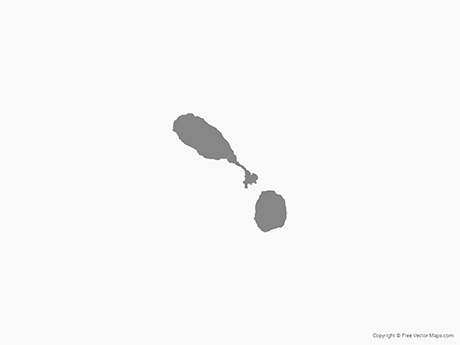

In [12]:
country_display()

In [13]:
game()


US: 4048 ■ ■ ■  □ □  79 ⇘ attempts remaining.
TR: 9460 ■ ■  □ □ □  52 ⇙ attempts remaining.
TR: 9460 ■ ■  □ □ □  52 ⇙ attempts remaining.
US: 4048 ■ ■ ■  □ □  79 ⇘ attempts remaining.
LR: 5904 ■ ■ ■  □ □  70 ⇖ attempts remaining.
MK: 8316 ■ ■  □ □ □  58 ⇙ attempts remaining. 
You're out of attempts! The correct answer was Saint Kitts and Nevis.
